In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors

cdict = {'red'  :  ((0., 0., 0.), (0.2, 1., 1.), (0.6, 1., 1.), (1., 0., 0.)),
         'green':  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 1., 1.), (1., 1., 1.)),
         'blue' :  ((0., 0., 0.), (0.2, 0., 0.), (0.6, 0., 0.), (1., 0., 0.))}

my_cmap = colors.LinearSegmentedColormap('my_colormap', cdict, 1024)

In [47]:
d_1_07012018 = 'Data/Probe_Data/2018_07_01_NewportBeach_basic_probe.csv'
d_2_07022018 = 'Data/Probe_Data/2018_07_02_NewportBeach_basic_probe.csv'
d_3_07032018 = 'Data/Probe_Data/2018_07_03_NewportBeach_basic_probe.csv'
d_4_07042018 = 'Data/Probe_Data/2018_07_04_NewportBeach_basic_probe.csv'
d_5_07052018 = 'Data/Probe_Data/2018_07_05_NewportBeach_basic_probe.csv'
d_6_07062018 = 'Data/Probe_Data/2018_07_06_NewportBeach_basic_probe.csv'
d_7_07072018 = 'Data/Probe_Data/2018_07_07_NewportBeach_basic_probe.csv'

In [113]:
# data = pd.read_csv('crop_data_Newport.csv') #changed .csv here

data = pd.read_csv(d_4_07042018,
                   names = ["PROBE_ID","SAMPLE_DATE", "LAT", "LONG", "HEADING",\
                           "SPEED","PROBE_DATA_PROVIDER","X","Y", "LOCAL_TIME"])
#Newport data is here: https://drive.google.com/open?id=1hIIFrDH2Y8MRH_95lgRx2iiQxls9G1pf
data.sort_values(by='SAMPLE_DATE', inplace=True, ascending=True) # This now sorts in date order
data.head(3)

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME
480,285613c2-f71d-55f6-bb2b-8f16528c0a2c,2018-07-04 00:00:00,33.615262,-117.927329,34.0,14.0,CONSUMER14,413977.562793,3.719884e+06,2018-07-03 17:00:00 -0700
479,285613c2-f71d-55f6-bb2b-8f16528c0a2c,2018-07-04 00:00:01,33.615269,-117.927325,19.0,12.0,CONSUMER14,413977.940815,3.719885e+06,2018-07-03 17:00:01 -0700
445,285613c2-f71d-55f6-bb2b-8f16528c0a2c,2018-07-04 00:00:02,33.615287,-117.927314,19.0,17.0,CONSUMER14,413978.979134,3.719886e+06,2018-07-03 17:00:02 -0700


In [114]:
print('unique data provider count',len(data.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data.PROBE_ID.unique()))
print('unique time',len(data.LOCAL_TIME.unique()))
print('raw data shape',data.shape)
# - Got 18 unique IDs vs 21 in the other set

unique data provider count 14
unique Probe_ID count 374
unique time 21156
raw data shape (25632, 10)


In [115]:
## I think this is where the Newport data is filtered out, in the original .csv the raw data shape is 40,11 here now it is 0,11
t1_series = data[data.LOCAL_TIME == '2018-06-01 16:49:26 -0700' ]
t1_series.head()
print('raw data shape',t1_series.shape)

# t2_series = data[data.LOCAL_TIME.isin'2018-06-01 16:49:26 -0700' ]
# print('raw data shape',t1_series.shape)

raw data shape (0, 10)


In [116]:
# Trajectory
ID_series = data[data.PROBE_ID == '19793987'] #'24046157' ] - I changed to pick a probe ID from the data list, but did not find anything still
ID_series.head()
print('raw data shape',ID_series.shape)

fleet_series = data[data.PROBE_DATA_PROVIDER == 'FLEET51' ]

print('raw data shape',fleet_series.shape)




raw data shape (0, 10)
raw data shape (1096, 10)


# to set specific regions of interest
intersection_center = data[data['edge_id'].isin(intersection_center_edges)]

In [117]:
def pos_heatmap(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))

    scatter = ax.scatter(data['X'].values,
                               data['Y'].values)
    scatter_heat = ax.scatter(data['X'].values,
                               data['Y'].values,
                               c=data['SPEED'], s=45, alpha=0.9,cmap=my_cmap)
    cbar = fig.colorbar(scatter_heat)
    cbar.set_label("Speed (m/s)",fontsize=20)
    cbar.ax.tick_params(labelsize=18)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show()   

def route_map(data,title):
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(14, 10))
    scatter = ax.plot(data['X'].values, data['Y'].values)
    plt.title(title,fontsize=25)
    plt.axis('off')
    plt.show() 
    
def mean_speed(data,title):
    plt.figure(figsize = (14,10))
    sns.lineplot(x=data['time'],y=data['speed'])
    plt.title(title,fontsize=25)
    plt.xlabel('Time (s)',fontsize=20)
    plt.ylabel('Mean Speed (m/s)',fontsize=20)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.show()

In [118]:
ID_series

,PROBE_ID,SAMPLE_DATE,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,X,Y,LOCAL_TIME


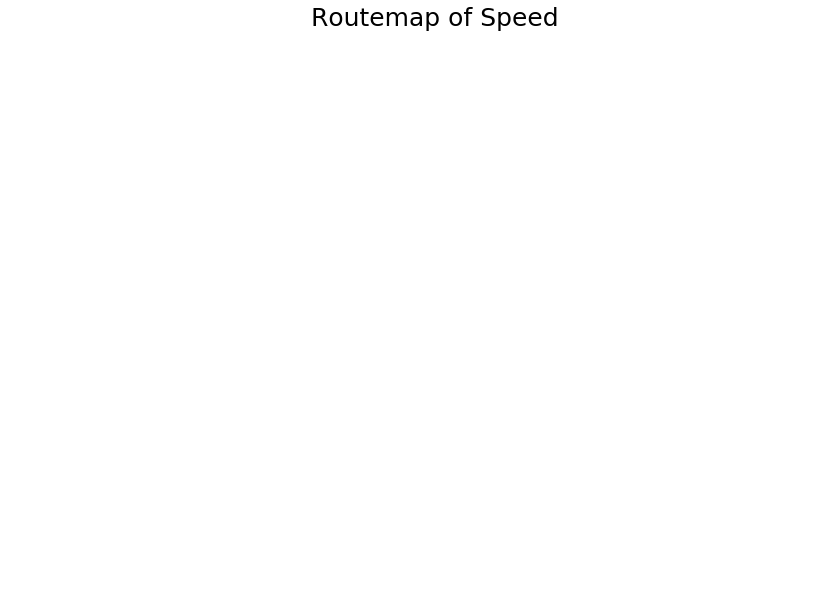

In [119]:
ax = route_map(ID_series,'Routemap of Speed') #Changed to routemap from heatmap

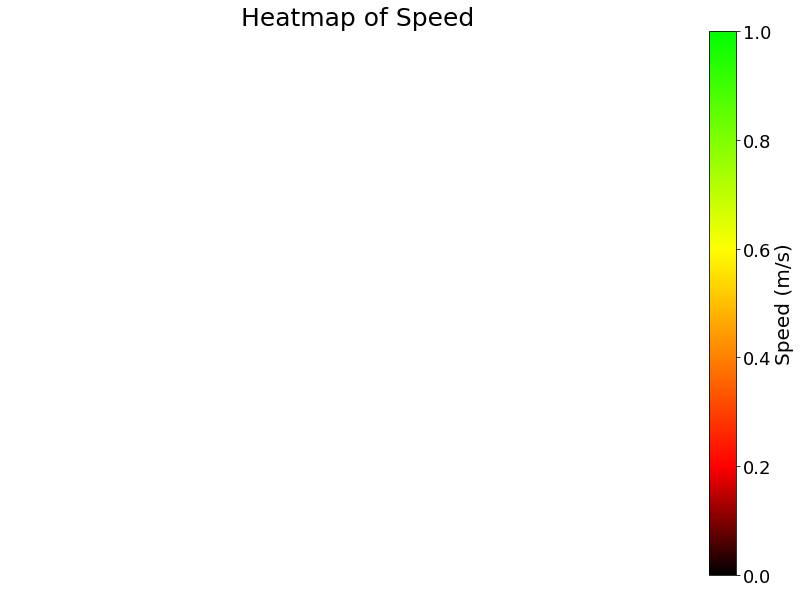

In [120]:
ax = pos_heatmap(ID_series,'Heatmap of Speed')

# Calculate Populations and Speeds in Each Area

In [121]:
import geopandas as gpd
import folium
from shapely.geometry import Polygon, Point, LineString
from datetime import datetime

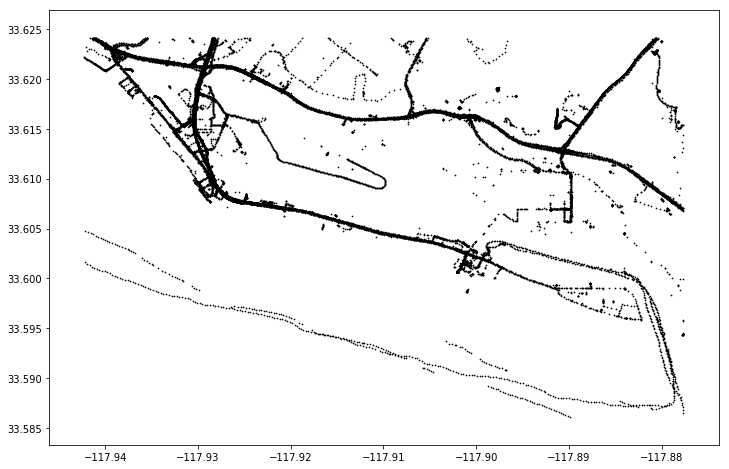

In [122]:
plt.figure(figsize = (12,8))
plt.scatter(data.LONG, data.LAT, s = 0.5, c = 'k')
plt.show()

In [123]:
# Read shape files into geopandas
right_half_tri_SF = gpd.read_file("shapefiles/right_half_triangle/right_half_triangle.shp")[['Name', 'geometry']]
left_half_tri_SF = gpd.read_file("shapefiles/left_half_triangle/left_half_triangle.shp")[['Name', 'geometry']]
island_SF = gpd.read_file("shapefiles/island/island.shp")[['Name', 'geometry']]
newport_SF = gpd.read_file("shapefiles/inundation_map/inundation_map.shp")[['Name', 'geometry']]
# Read Street Shape Files
balboa_blvd = gpd.read_file("shapefiles/Streets/Balboa/Balboa_Blvd-polygon.shp")[['Name', 'geometry']]
w_balboa_blvd = gpd.read_file("shapefiles/Streets/W_Balboa/W_Balboa-polygon.shp")[['Name', 'geometry']]
newport = gpd.read_file("shapefiles/Streets/Newport/Newport_Blvd-polygon.shp")[['Name', 'geometry']]

In [124]:
shape_df = right_half_tri_SF.append([left_half_tri_SF, island_SF,newport_SF])

In [125]:
# Turn coordinates into points
def create_point(row):
    return Point(row['LONG'],row['LAT'])

In [126]:
data['coord'] = data.apply(create_point, axis=1)
data['section'] = 'N/A'

In [127]:
section = []

for i in data.index.values:
    if right_half_tri_SF['geometry'][0].contains(data['coord'][i]):
        section.append('right_half_tri')
    elif left_half_tri_SF['geometry'][0].contains(data['coord'][i]):
        section.append('left_half_tri')
    elif island_SF['geometry'][0].contains(data['coord'][i]):
        section.append('island')
    elif newport_SF['geometry'][0].contains(data['coord'][i]):
        section.append('rest_of_new_port')
    else:
        section.append('N/A')
        
data['section'] = section

In [128]:
street = []

for i in data.index.values:
    if balboa_blvd['geometry'][0].contains(data['coord'][i]):
        street.append('balboa')
    elif w_balboa_blvd['geometry'][0].contains(data['coord'][i]):
        street.append('w_balboa')
    elif newport['geometry'][0].contains(data['coord'][i]):
        street.append('newport')
    else:
        street.append('N/A')
        
data['street'] = street

In [129]:
data_cleaned = data[data.section != 'N/A'][['PROBE_ID','LAT','LONG',\
                                            'HEADING',\
                                            'SPEED',\
                                            'PROBE_DATA_PROVIDER',\
                                            'LOCAL_TIME',\
                                            'coord',\
                                            'section','street']]

In [130]:
print('unique data provider count',len(data_cleaned.PROBE_DATA_PROVIDER.unique()))
print('unique Probe_ID count',len(data_cleaned.PROBE_ID.unique()))
print('unique time',len(data_cleaned.LOCAL_TIME.unique()))
print('raw data shape',data_cleaned.shape)

unique data provider count 11
unique Probe_ID count 171
unique time 11888
raw data shape (12893, 10)


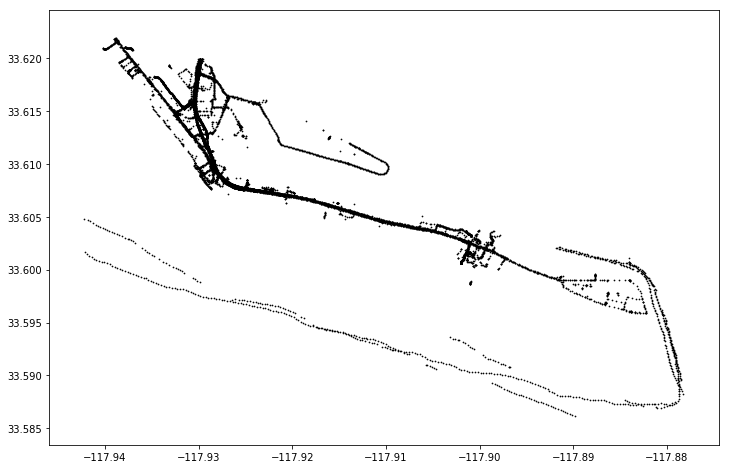

In [131]:
plt.figure(figsize = (12,8))
plt.scatter(data_cleaned.LONG, data_cleaned.LAT, s = 0.5, c = 'k')
plt.show()

## Unique Probes per area

In [132]:
rht_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'right_half_tri'].PROBE_ID.unique()
lht_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'left_half_tri'].PROBE_ID.unique()
isl_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'island'].PROBE_ID.unique()
rest_uniq_probe = data_cleaned.loc[data_cleaned['section'] == 'rest_of_new_port'].PROBE_ID.unique()

In [133]:
data_cleaned['LOCAL_TIME'] = pd.to_datetime(data_cleaned['LOCAL_TIME']).dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles')
# Separate to hours
data_cleaned['HOUR'] = data_cleaned['LOCAL_TIME'].dt.hour  

# For calcualting heading related info on Balboa and Newport

In [134]:
# To make life easier when dealing with headings
heading_fixed = []
for i in data_cleaned.index.values:
    if data_cleaned['HEADING'][i] >180:
        heading_fixed.append(-(360 - data_cleaned['HEADING'][i]))
    else:
        heading_fixed.append(data_cleaned['HEADING'][i])

In [135]:
data_cleaned['HEADING_FIXED'] = heading_fixed

In [136]:
balboa_df = data_cleaned.loc[data_cleaned['street']=='balboa'].copy()
newport_df = data_cleaned.loc[data_cleaned['street']=='newport'].copy()

## Notes
- For vehicle speeds, assume all 0 speeds means stopping at a light and is ignored

## Headings
- Uses fixed headings
### For Newport
- Northbound: -90 <= heading <= 45
- Southbound: 145 <= heading <= -150

### For Balboa
- Northbound: -140 <= heading <= 0
- Sounthbound: 90 <= heading <= -160





In [137]:
def get_heading_info(df, lower_head, upper_head):
    
    '''
    Inputs:
        df - cleaned up dataframe with hours and streets 
        lower_head - lower heading limits for traffic
        upper_head - upper heading limits for traffic
        
    Outputs:
        head_speed - list of 24 north heading speeds averaged over an hour
        head_unique_probe_vehicle - list of 24 counts of unique probe ids in that hour - vehicles
        head_unique_probe_ped - list of 24 counts of unique probe ids in that hour - pedestrian
    '''
    head_speed_veh = []
    head_speed_ped = []
    head_unique_probe_vehicle = []
    head_unique_probe_ped = []
    
    
    for i in range(24):
        head_df = df.loc[(df['HOUR']==i) & \
                         ((df['HEADING_FIXED'] >= lower_head) | \
                         (df['HEADING_FIXED'] <= upper_head))][['PROBE_ID','SPEED']]
        
        head_df = head_df[head_df['SPEED'] != 0]
        unique_probe_list = list(set(head_df['PROBE_ID']))

        ped_count = 0
        veh_count = 0
        ped_speed = []
        veh_speed = []
        for j in unique_probe_list:

            probe_df = head_df.loc[head_df['PROBE_ID'] == j]
            mean_speed = np.mean(probe_df['SPEED'])
            
            if mean_speed <= 15:
                ped_count += 1
                ped_speed.append(mean_speed)
                
            else:
                veh_count += 1
                veh_speed.append(mean_speed)
        
        head_unique_probe_vehicle.append(veh_count)
        head_unique_probe_ped.append(ped_count)
        
        if not ped_speed:
            head_speed_ped.append([])
        else:
            head_speed_ped.append(np.mean(ped_speed))
            
        if not veh_speed:
            head_speed_veh.append([])
        else:
            head_speed_veh.append(np.mean(veh_speed))
        
    return head_speed_veh, head_speed_ped, head_unique_probe_vehicle, head_unique_probe_ped
    

In [138]:
#Balboa
bal_north_limits = [-90,45]
bal_south_limits = [145,-150]
balboa_north_speed_veh, balboa_north_speed_ped, balboa_north_unique_veh,balboa_north_unique_ped  = get_heading_info(balboa_df,\
                                                           bal_north_limits[0],\
                                                           bal_north_limits[1])
balboa_south_speed_veh, balboa_south_speed_ped,balboa_south_unique_veh,balboa_south_unique_ped  = get_heading_info(balboa_df,\
                                                           bal_south_limits[0],\
                                                           bal_south_limits[1])

# Newport
newport_north_limits = [-140,0]  
newport_south_limits = [90,-160]
newport_north_speed_veh, newport_north_speed_ped, newport_north_unique_veh, newport_north_unique_ped = get_heading_info(newport_df,\
                                                             newport_north_limits[0],\
                                                             newport_north_limits[1])
newport_south_speed_veh, newport_south_speed_ped, newport_south_unique_veh, newport_south_unique_ped = get_heading_info(newport_df,\
                                                             newport_south_limits[0],\
                                                             newport_south_limits[1])

In [139]:
# Create a dataframe of road information per hour
road_info_df = pd.DataFrame({'Hour':range(0,24),\
                'Newport_North_Speed_Veh':newport_north_speed_veh,\
                'Newport_South_Speed_Veh':newport_south_speed_veh,\
                'Newport_North_Probe_Veh':newport_north_unique_veh,\
                'Newport_South_Probe_Veh':newport_south_unique_veh,\
                'Newport_North_Speed_Ped':newport_north_speed_ped,\
                'Newport_South_Speed_Ped':newport_south_speed_ped,\
                'Newport_North_Probe_Ped':newport_north_unique_ped,\
                'Newport_South_Probe_Ped':newport_south_unique_ped,\
                             
                'Balboa_North_Speed_Veh':balboa_north_speed_veh,\
                'Balboa_South_Speed_Veh':balboa_south_speed_veh,\
                'Balboa_North_Probe_Veh':balboa_north_unique_veh,\
                'Balboa_South_Probe_Veh':balboa_south_unique_veh,\
                'Balboa_North_Speed_Ped':balboa_north_speed_ped,\
                'Balboa_South_Speed_Ped':balboa_south_speed_ped,\
                'Balboa_North_Probe_Ped':balboa_north_unique_ped,\
                'Balboa_South_Probe_Ped':balboa_south_unique_ped})



In [140]:
road_info_df

,Hour,Newport_North_Speed_Veh,Newport_South_Speed_Veh,Newport_North_Probe_Veh,Newport_South_Probe_Veh,Newport_North_Speed_Ped,Newport_South_Speed_Ped,Newport_North_Probe_Ped,Newport_South_Probe_Ped,Balboa_North_Speed_Veh,Balboa_South_Speed_Veh,Balboa_North_Probe_Veh,Balboa_South_Probe_Veh,Balboa_North_Speed_Ped,Balboa_South_Speed_Ped,Balboa_North_Probe_Ped,Balboa_South_Probe_Ped
0,0,41.329114,45.3291,2,2,[],[],0,0,32.8125,25.7778,1,1,[],[],0,0
1,1,27.358780,27.3588,1,1,[],[],0,0,[],[],0,0,[],[],0,0
2,2,27.285714,15.5714,2,1,[],[],0,0,[],[],0,0,5.73434,7.5,2,1
3,3,30.577460,30.5775,1,1,10.7204,8.96632,2,1,[],[],0,0,10.8567,[],2,0
4,4,41.038170,15.2887,1,1,11.9057,[],2,0,[],[],0,0,[],[],0,0
5,5,29.504567,39.4288,1,1,[],[],0,0,[],[],0,0,7.24203,[],1,0
6,6,47.054110,41,2,1,[],[],0,0,31.5,[],1,0,7.24203,9.65604,2,1
7,7,37.823529,37.8235,1,1,10.3043,10.3043,1,1,17.0833,18,2,2,12.5,12,1,1
8,8,32.171290,28.5828,4,3,[],[],0,0,24.95,18.7778,1,1,5,5,1,1
9,9,23.520513,31.3615,3,1,8.17857,10.9226,1,2,22.5308,[],1,0,9.62821,9.24,2,2


# Find Residents

In [141]:
data_cleaned.head()

,PROBE_ID,LAT,LONG,HEADING,SPEED,PROBE_DATA_PROVIDER,LOCAL_TIME,coord,section,street,HOUR,HEADING_FIXED
480,285613c2-f71d-55f6-bb2b-8f16528c0a2c,33.615262,-117.927329,34.0,14.0,CONSUMER14,2018-07-03 17:00:00-07:00,POINT (-117.927329 33.615262),right_half_tri,N/A,17,34.0
479,285613c2-f71d-55f6-bb2b-8f16528c0a2c,33.615269,-117.927325,19.0,12.0,CONSUMER14,2018-07-03 17:00:01-07:00,POINT (-117.927325 33.615269),right_half_tri,N/A,17,19.0
445,285613c2-f71d-55f6-bb2b-8f16528c0a2c,33.615287,-117.927314,19.0,17.0,CONSUMER14,2018-07-03 17:00:02-07:00,POINT (-117.927314 33.615287),right_half_tri,N/A,17,19.0
494,6c247e2bf8f447b2b31b7450261a1e3c,33.618990,-117.930160,189.0,4.0,CONSUMER21,2018-07-03 17:00:03-07:00,POINT (-117.93016 33.61899),right_half_tri,newport,17,-171.0
2276,285613c2-f71d-55f6-bb2b-8f16528c0a2c,33.615319,-117.927299,18.0,20.0,CONSUMER14,2018-07-03 17:00:03-07:00,POINT (-117.927299 33.615319),right_half_tri,N/A,17,18.0


In [142]:
res_data = data_cleaned.loc[data_cleaned['street'] == "N/A"]

In [143]:
uniqe_res_probe = list(set(data_cleaned["PROBE_ID"]))

In [144]:
speed_list = []
for i in uniqe_res_probe:
    speed = np.mean(res_data.loc[res_data["PROBE_ID"]==i]["SPEED"])
    if speed == 0:
        speed_list.append(speed)

In [145]:
len(speed_list)

10